In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

C:\Users\Atharva\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import os
os.environ['CUDA _VISIBLE DEVICES']='-1'

In [5]:
x_train = np.loadtxt(r'C:\Users\Atharva\OneDrive\Desktop\3\input.csv', delimiter=',')
y_train = np.loadtxt(r'C:\Users\Atharva\OneDrive\Desktop\3\labels.csv', delimiter=',')

x_test = np.loadtxt(r'C:\Users\Atharva\OneDrive\Desktop\3\input_test.csv', delimiter = ',')
y_test = np.loadtxt(r'C:\Users\Atharva\OneDrive\Desktop\3\labels_test.csv', delimiter = ',')

In [6]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

x_train = x_train/255.0
x_test = x_test/255.0

In [7]:
print("Shape of X_train: ", x_train.shape)
print("Shape of Y_train: ", y_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of Y_test: ", y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


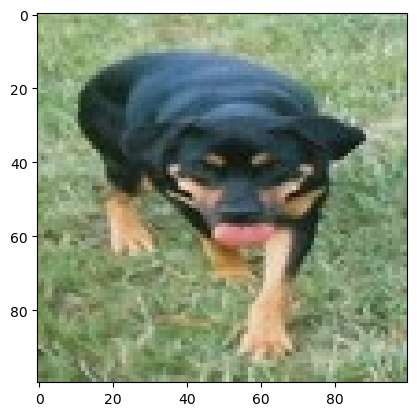

In [8]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
model.fit(x_train, y_train, epochs = 10, batch_size = 64)

Epoch 1/10
32/32 [==============================] - 6s 192ms/step - loss: 0.4784 - accuracy: 0.7790
Epoch 2/10
32/32 [==============================] - 6s 194ms/step - loss: 0.4374 - accuracy: 0.7970
Epoch 3/10
32/32 [==============================] - 6s 194ms/step - loss: 0.3964 - accuracy: 0.8250
Epoch 4/10
32/32 [==============================] - 6s 198ms/step - loss: 0.3283 - accuracy: 0.8625
Epoch 5/10
32/32 [==============================] - 7s 206ms/step - loss: 0.2711 - accuracy: 0.8950
Epoch 6/10
32/32 [==============================] - 7s 216ms/step - loss: 0.2493 - accuracy: 0.9020
Epoch 7/10
32/32 [==============================] - 7s 211ms/step - loss: 0.2014 - accuracy: 0.9230
Epoch 8/10
32/32 [==============================] - 7s 204ms/step - loss: 0.1554 - accuracy: 0.9525
Epoch 9/10
32/32 [==============================] - 7s 208ms/step - loss: 0.1193 - accuracy: 0.9600
Epoch 10/10
32/32 [==============================] - 7s 204ms/step - loss: 0.0949 - accuracy: 0.9785

In [21]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 19ms/step - loss: 1.0924 - accuracy: 0.6525


[1.0923765897750854, 0.6524999737739563]

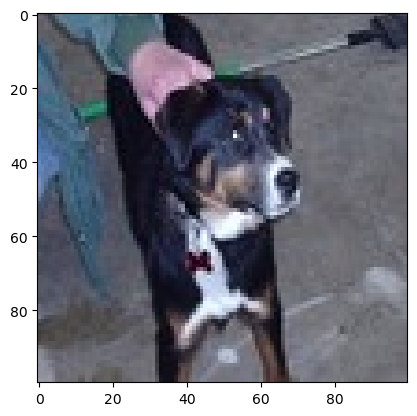

1/1 [==============================] - 0s 16ms/step
Our model says it is a : dog


In [23]:
#Making Predictions
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)

In [24]:
score=model.evaluate(x_test, y_test, verbose=0)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Test score:  1.0923765897750854
Test accuracy:  0.6524999737739563


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 16928)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [27]:
val=model.fit(x_train, y_train, epochs=5, batch_size=30, validation_data=(x_test, y_test))

Epoch 1/5
67/67 [==============================] - 7s 109ms/step - loss: 0.1270 - accuracy: 0.9580 - val_loss: 1.0824 - val_accuracy: 0.6575
Epoch 2/5
67/67 [==============================] - 7s 107ms/step - loss: 0.1140 - accuracy: 0.9575 - val_loss: 1.3173 - val_accuracy: 0.6275
Epoch 3/5
67/67 [==============================] - 7s 109ms/step - loss: 0.0815 - accuracy: 0.9765 - val_loss: 1.4389 - val_accuracy: 0.6375
Epoch 4/5
67/67 [==============================] - 7s 109ms/step - loss: 0.0694 - accuracy: 0.9770 - val_loss: 1.4249 - val_accuracy: 0.6650
Epoch 5/5
67/67 [==============================] - 7s 108ms/step - loss: 0.0252 - accuracy: 0.9965 - val_loss: 1.8723 - val_accuracy: 0.6400


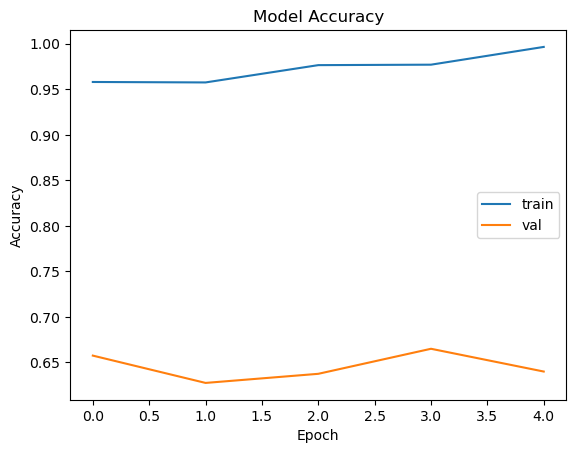

In [28]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(val.history['accuracy'])
plt.plot(val.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.show()